In [31]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib

In [40]:
img_height = 224
img_width = 224
input_shape = (img_width, img_height, 1)
batch_size = 8
train_dir = pathlib.Path('D:/Thesis_data/compartment_training')
test_dir  = pathlib.Path('D:/Thesis_data/compartment_testing')
checkpoint_dir = pathlib.Path('D:./TF_checkpoint/compartmentized/weight/')
model_dir = pathlib.Path('D:./TF_backup/compartment/compartment.h5')
model_plot_dir = pathlib.Path('D:./TF_backup/compartment/compartment.png')
classes = ['Compartmentized', 'Plated']

In [34]:
test_ds = keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    color_mode="grayscale",
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
# 
test_ds = test_ds.prefetch(1)

Found 12000 files belonging to 2 classes.


In [35]:
for img,lab in test_ds.take(1):
    print(np.shape(img))

(16, 224, 224, 1)


In [61]:
Gx = np.array([[
    [-1, 0, 1,-2, 0, 2,-1, 0, -1]
]], dtype=np.float32)

Gy = np.array([[
    [1, 2, 1, 0, 0, 0, -1, -2, -1]
]], dtype=np.float32)

Gx = np.multiply(Gx, 0.125)
Gx = tf.Variable(tf.constant(Gx, shape=[3, 3, 1, 1]))

Gy = np.multiply(Gy, 0.125)
Gy = tf.Variable(tf.constant(Gy, shape=[3, 3, 1, 1]))

input_layer = layers.Input(shape=input_shape)
contrast = tf.image.adjust_contrast(input_layer, 1.5)
# # # satu = tf.image.adjust_saturation(input_layer, 1.5)
# bri = tf.image.adjust_brightness(input_layer,-30)
gx = tf.nn.conv2d(contrast,Gx, strides=[1, 1, 1, 1], padding='VALID')
thresX = layers.ThresholdedReLU(theta=5)(gx)

gy = tf.nn.conv2d(contrast,Gy, strides=[1, 1, 1, 1], padding='VALID')
thresY = layers.ThresholdedReLU(theta=5)(gy)

add = layers.Add()([thresX,thresY])
# conc = layers.concatenate([gx, gy], axis=1)
# thres = layers.ThresholdedReLU(theta=5)(add)
model = keras.Model(input_layer, add)
model.summary()
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# print(tsed)


Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 tf.image.adjust_contrast_23 (T  (None, 224, 224, 1)  0          ['input_24[0][0]']               
 FOpLambda)                                                                                       
                                                                                                  
 tf.compat.v1.nn.conv2d_45 (TFO  (None, 222, 222, 1)  0          ['tf.image.adjust_contrast_23[0][
 pLambda)                                                        0]']                      

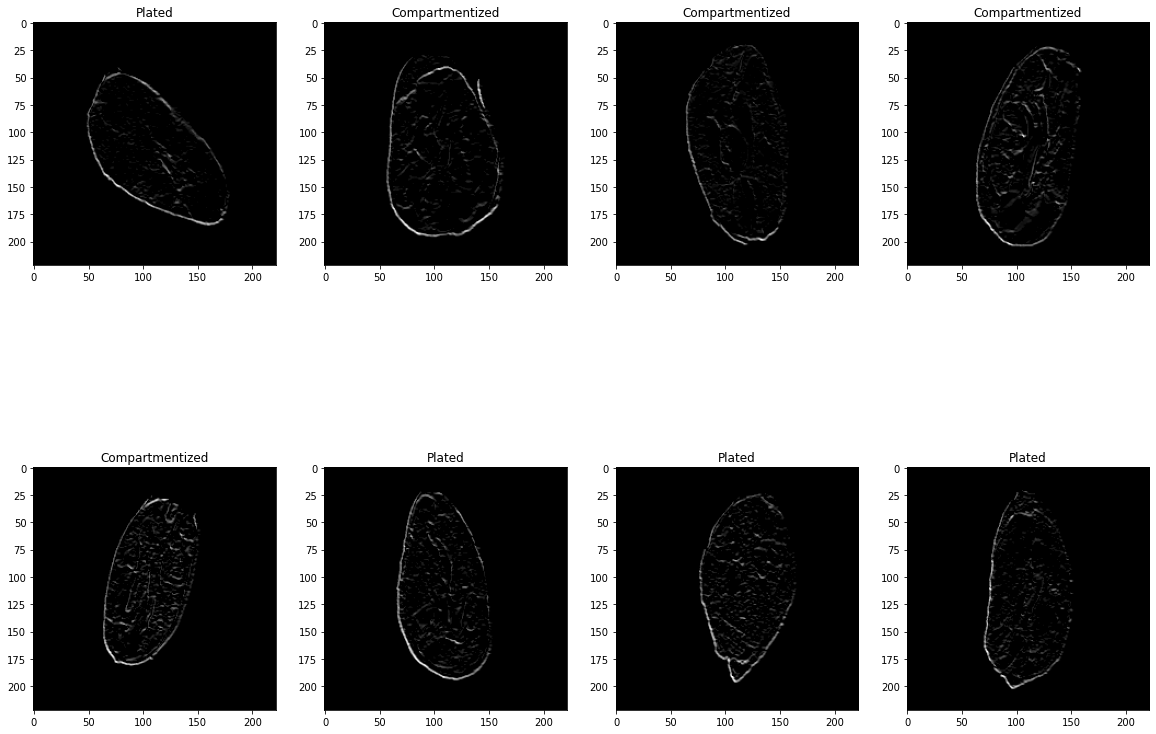

In [60]:
# col = 2
# matplotlib.rcParams['figure.figsize'] = [20, 50]
# i=0
# for img_batch, lab_batch in train_ds.take(1):
#     # print(np.shape(img_batch))
#     fed = model.predict_on_batch (img_batch)
# #     fed=feed[0]
# #     fed2=feed[1]
# #     print(np.shape(fed))
#     for k in range(batch_size):
#         tt = classes[np.argmax(lab_batch[i])]
#         # if (tt=="Slaty") or (tt=="Others") or (tt=="White"): 
#         #     continue
#         # else:
#         plt.subplot(8,col,col*i +1)
#         plt.imshow(np.asarray(img_batch[i].numpy(), dtype=np.uint8))
#         plt.subplot(8,col,col*i +2)
#         plt.imshow(np.asarray(fed[i], dtype=np.uint8))
# #         plt.subplot(8,3,3*i +3)
# #         plt.imshow(np.asarray(fed2[i], dtype=np.uint8))
# #         plt.title(tt)
#         print(tt)
#         i=i+1